# Data Analysis

After cleaning our data, and gathering the stock price of the corresponding company, we can begin our data analysis before building and training our model.  

### Exploratory Data Analysis

In [61]:
import pandas as pd

In [62]:
merged_data_df = pd.read_csv('../DataFrames/merged_data_df.tsv')

In [63]:
# import matplotlib package
import matplotlib.pyplot as plt

In [64]:
# import seaborn package
import seaborn as sns

#### Content vs Price Change

Text(0.5, 1.0, 'Distribution of Content Sentiment')

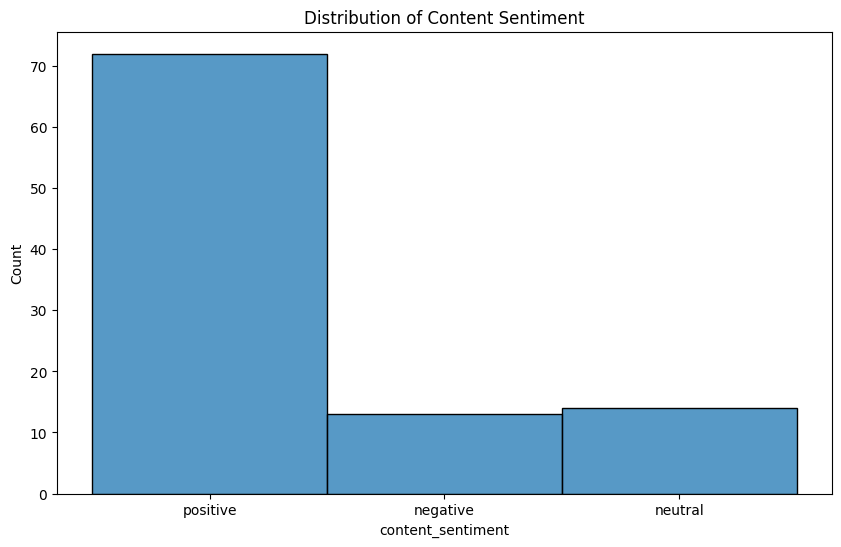

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_df['content_sentiment'])
plt.title('Distribution of Content Sentiment')

Text(0.5, 1.0, 'Content Sentiment Score vs Price Change')

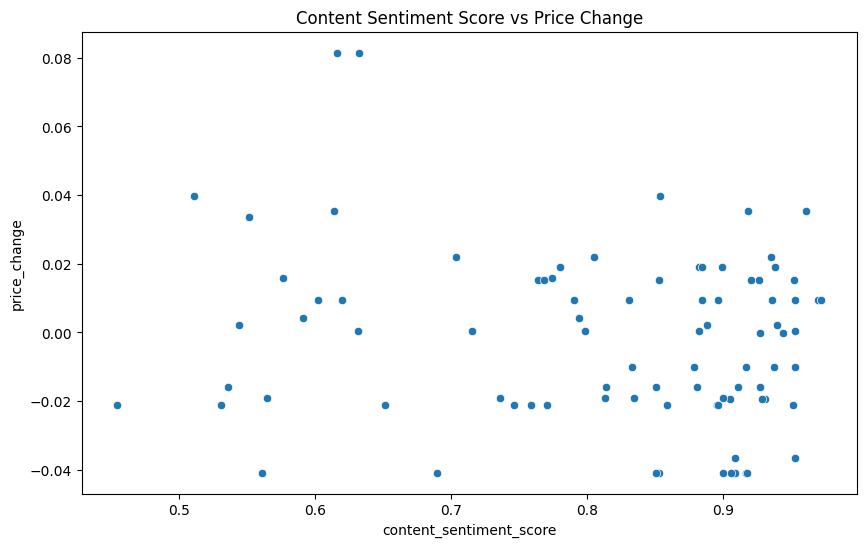

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_sentiment_score', y='price_change', data=merged_data_df)
plt.title('Content Sentiment Score vs Price Change')

In [67]:
content_correlation = merged_data_df['content_sentiment_score'].corr(merged_data_df['price_change'])

In [68]:
content_correlation

np.float64(-0.183105638538057)

#### Title vs Price Change Data Analysis

Text(0.5, 1.0, 'Distribution of Title Sentiment')

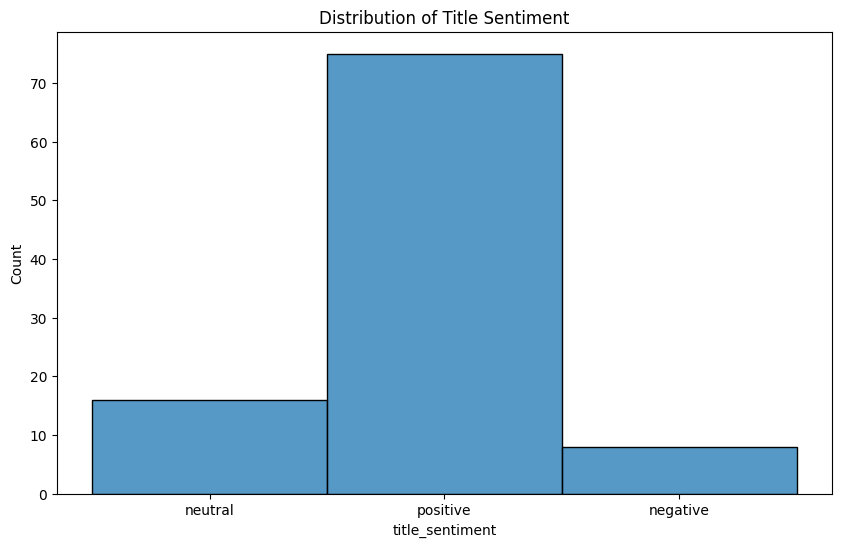

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_df['title_sentiment'])
plt.title('Distribution of Title Sentiment')

Text(0.5, 1.0, 'Title Sentiment Score vs Price Change')

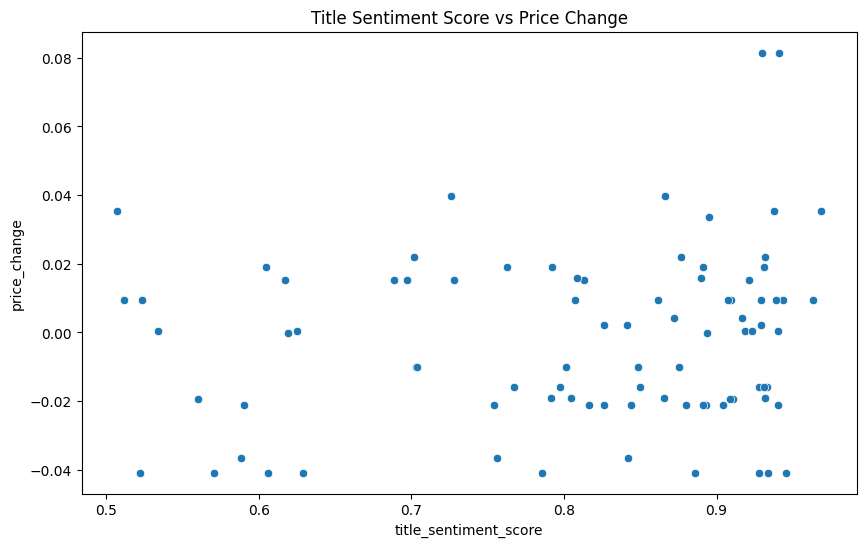

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_sentiment_score', y='price_change', data=merged_data_df)
plt.title('Title Sentiment Score vs Price Change')

In [71]:
title_correlation = merged_data_df['title_sentiment_score'].corr(merged_data_df['price_change'])

In [72]:
title_correlation

np.float64(0.12553115411801158)

### Feature Engineering

In [73]:
merged_data_df['daily_avg_sentiment'] = merged_data_df.groupby('date')['content_sentiment_score'].transform('mean')
merged_data_df['prev_day_sentiment'] = merged_data_df.groupby('date')['content_sentiment_score'].shift(1)

In [74]:
merged_data_df

,title_sentiment,title_sentiment_score,content_sentiment,content_sentiment_score,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,price_change,daily_avg_sentiment,prev_day_sentiment
0,neutral,0.909428,positive,0.952919,2024-09-04,105.400985,113.260306,104.111095,106.200912,372470300.0,0.0,0.0,0.009415,0.845421,NaN
1,positive,0.807024,positive,0.884717,2024-09-04,105.400985,113.260306,104.111095,106.200912,372470300.0,0.0,0.0,0.009415,0.845421,0.952919
2,neutral,0.907637,negative,0.619797,2024-09-04,105.400985,113.260306,104.111095,106.200912,372470300.0,0.0,0.0,0.009415,0.845421,0.884717
3,neutral,0.963091,positive,0.896472,2024-09-04,105.400985,113.260306,104.111095,106.200912,372470300.0,0.0,0.0,0.009415,0.845421,0.619797
4,positive,0.861416,positive,0.935935,2024-09-04,105.400985,113.260306,104.111095,106.200912,372470300.0,0.0,0.0,0.009415,0.845421,0.896472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,neutral,0.910408,neutral,0.950407,2024-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821161,0.952919
95,positive,0.923365,positive,0.923918,2024-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821161,0.950407
96,negative,0.625904,positive,0.952919,2024-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952919,0.952919
97,positive,0.898789,positive,0.924873,2024-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874866,0.824858


### Statistical Analysis

In [75]:
# import stats module from scipy
from scipy import stats

In [77]:
t_stat, p_value = stats.ttest_ind(merged_data_df[merged_data_df['content_sentiment'] == 'positive']['price_change'],
                                  merged_data_df[merged_data_df['content_sentiment'] == 'negative']['price_change'])

In [78]:
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

T-test results: t-statistic = nan, p-value = nan
